##### Copyright 2019 The TensorFlow Authors.
##### This notebook is based on https://www.tensorflow.org/tutorials/quickstart/beginner

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.
4. Save the model as saved_model
5. Convert the saved_model to onnx_model 

To run this notebook, please install [Anaconda](https://www.anaconda.com/) and create a conda environment. Activate
the created environment and install tensorflow 2.5, jupyter, tf2onnx, matplotplib and numpy
```
pip install tensorflow==2.5.0
pip install jupyter
pip install tf2onnx
pip install matplotplib
pip install numpy

```
Use your terminal to launch the notebook by executing "jupyter notebook". You should be able to see your browser running notebook's server. Open this tutorial by clicking MNIST_Keras_tutorial.ipynb and clicking the tab "Cell/Run All" to see the result.

Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

In [2]:
import tensorflow as tf
import numpy as np

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [4]:
x_train.shape

(60000, 28, 28, 1)

Visualize the dataset 

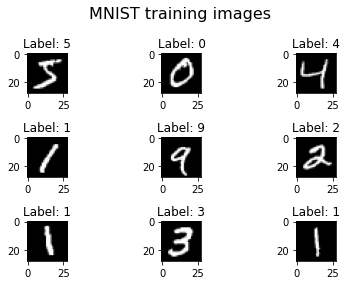

In [5]:
import numpy as np
import matplotlib.pyplot as plt

width=4
height=4
rows = 3
cols = 3
axes=[]
fig=plt.figure()
fig.suptitle('MNIST training images', fontsize=16)
for i in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, i+1) )
    subplot_title=("Label: "+str(y_train[i]))
    axes[-1].set_title(subplot_title)  
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
fig.tight_layout()    
plt.show()

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [7]:
predictions = model(x_train[:1]).numpy()
print(predictions.shape)

(1, 10)


The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [8]:
tf.nn.softmax(predictions).numpy()

array([[0.09926894, 0.10092081, 0.09792725, 0.10026331, 0.10091434,
        0.09958546, 0.10027371, 0.09828682, 0.10325253, 0.09930684]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [10]:
loss_fn(y_train[:1], predictions).numpy()

2.3067393

In [11]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [12]:
history = model.fit(x_train, y_train, validation_split=0.33, epochs=1)

/Users/Ben/miniconda3/envs/nnuxe/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1257/1257 [==============================] - 14s 11ms/step - loss: 0.2669 - accuracy: 0.9163 - val_loss: 0.0833 - val_accuracy: 0.9754


Plot the history of training

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


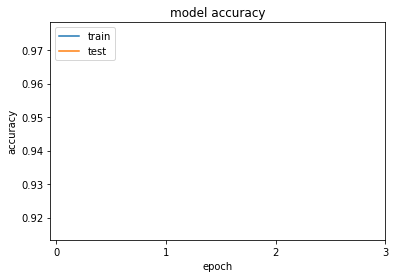

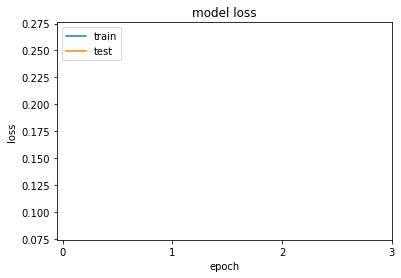

In [13]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks(range(0,4))
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks(range(0,4))
plt.show()

The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [14]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0696 - accuracy: 0.9806


[0.06960046291351318, 0.9805999994277954]

Visualize prediction

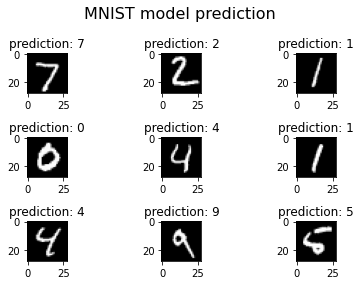

In [15]:
import numpy as np
import matplotlib.pyplot as plt

width=4
height=4
rows = 3
cols = 3
axes=[]
fig=plt.figure()
fig.suptitle('MNIST model prediction', fontsize=16)
logits = model(x_test[:rows*cols])
y_preds = np.argmax(logits,axis=1)
for i in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, i+1) )
    subplot_title=("prediction: "+str(y_preds[i]))
    axes[-1].set_title(subplot_title)  
    plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
fig.tight_layout()    
plt.show()

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [16]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [17]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08533707, 0.08533706, 0.0853383 , 0.08533796, 0.08533706,
        0.08533706, 0.08533706, 0.23196423, 0.08533706, 0.08533711],
       [0.08549401, 0.08544359, 0.23121306, 0.08541874, 0.08538447,
        0.08538514, 0.0854702 , 0.08538447, 0.08542187, 0.08538447],
       [0.08539265, 0.23112208, 0.08539806, 0.08539441, 0.08564642,
        0.08539102, 0.08541924, 0.08543605, 0.08540891, 0.08539113],
       [0.2319627 , 0.08533716, 0.085338  , 0.08533718, 0.08533716,
        0.08533733, 0.08533806, 0.08533722, 0.0853373 , 0.08533794],
       [0.08534213, 0.08534211, 0.08534224, 0.08534212, 0.2318849 ,
        0.08534208, 0.08534224, 0.08534285, 0.08534221, 0.0853771 ]],
      dtype=float32)>

Great!, now you trained a precise Deep Learning model
Let's compile and deploy this model into Arm CortexM backend with ONNC SaaS service

In [18]:
from onnc.workspace import Workspace

Use Worksapace as a context manager, we can upload a model, compile it and download corresponding loadable and examples.

In [19]:
with Workspace() as ws:
    # upload model and its calibration dataset
    res_upload = ws.upload_model(model, x_test, input_name='input_1')
    
    # compile and optimize the model for the target board
    res_compile = ws.compile(board='NUMAKER_IOT_M487', ram_size=65536)

    # download the compiled model(loadable)
    res_download = ws.download('./loadable', unzip=True)

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
<class 'numpy.ndarray'>
Counld not remove /var/folders/05/k3v8q_jj0m1flpx3tb_4t5l00000gn/T/pocj6im8.h5/.zip since it doesn't exist


In [20]:
print("upload_model:", res_upload)

upload_model: {'success': True, 'model_id': 'ea63eb71-005e-480f-85ca-870fe9d3b67b', 'sample_id': '5c97409e-5482-4bda-a8e0-5a3212842371'}


In [21]:
print("compile:", res_compile)

compile: {'success': True, 'loadable_id': '921340b2-e7ce-40bf-b835-74bae3cd0917', 'board': 'NUMAKER_IOT_M487', 'ram_size': 65536, 'report': {'ram': 31034, 'rom': 35238}}


In [22]:
print("download:", res_download)

download: {'success': True}
